# Proyek Klasifikasi Gambar: [Input Nama Dataset]
- **Nama:** Lucas Chandra
- **Email:** lucaschandra18@gmail.com
- **ID Dicoding:** lucas_chndra

## Import Semua Packages/Library yang Digunakan

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lucascha","key":"6ee5fce662be883e09df2bfb406e4795"}'}

In [5]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
#Download dataset dari Kaggle
!kaggle datasets download -d misrakahmed/vegetable-image-dataset
# Ekstrak file zip
!unzip -q vegetable-image-dataset.zip -d vegetable_dataset

Dataset URL: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset
License(s): CC-BY-SA-4.0


## Data Preparation

### Data Loading

In [17]:
img_size = (128, 128)
batch_size = 32

train_dir = '/content/vegetable_dataset/Vegetable Images/train'
val_dir = '/content/vegetable_dataset/Vegetable Images/validation'
test_dir = '/content/vegetable_dataset/Vegetable Images/test'

### Data Preprocessing

#### Split Dataset

In [19]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [20]:
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False)

num_classes = len(train_generator.class_indices)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


## Modelling

In [21]:
# Bangun Model CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 15)             │         3,855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,519,887 (24.87 MB)

 Trainable params: 6,519,887 (24.87 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.3354 - loss: 1.9517

469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 167ms/step - accuracy: 0.3357 - loss: 1.9508 - val_accuracy: 0.7057 - val_loss: 0.8745
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.6989 - loss: 0.9095

469/469 ━━━━━━━━━━━━━━━━━━━━ 72s 155ms/step - accuracy: 0.6990 - loss: 0.9093 - val_accuracy: 0.8213 - val_loss: 0.5677
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 72s 154ms/step - accuracy: 0.7951 - loss: 0.6311 - val_accuracy: 0.7637 - val_loss: 0.7847
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.8296 - loss: 0.5195

469/469 ━━━━━━━━━━━━━━━━━━━━ 73s 156ms/step - accuracy: 0.8296 - loss: 0.5194 - val_accuracy: 0.8853 - val_loss: 0.3786
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.8764 - loss: 0.3821

469/469 ━━━━━━━━━━━━━━━━━━━━ 73s 157ms/step - accuracy: 0.8764 - loss: 0.3821 - val_accuracy: 0.9327 - val_loss: 0.2550
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.8884 - loss: 0.3535

469/469 ━━━━━━━━━━━━━━━━━━━━ 72s 154ms/step - accuracy: 0.8884 - loss: 0.3535 - val_accuracy: 0.9313 - val_loss: 0.2521
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.9100 - loss: 0.2994

469/469 ━━━━━━━━━━━━━━━━━━━━ 73s 156ms/step - accuracy: 0.9100 - loss: 0.2994 - val_accuracy: 0.9367 - val_loss: 0.2024
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 74s 157ms/step - accuracy: 0.9196 - loss: 0.2533 - val_accuracy: 0.9437 - val_loss: 0.2029
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.9327 - loss: 0.2208

469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 153ms/step - accuracy: 0.9327 - loss: 0.2208 - val_accuracy: 0.9617 - val_loss: 0.1397
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 72s 153ms/step - accuracy: 0.9310 - loss: 0.2153 - val_accuracy: 0.9523 - val_loss: 0.1910
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 72s 153ms/step - accuracy: 0.9435 - loss: 0.1822 - val_accuracy: 0.9380 - val_loss: 0.2756
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.9433 - loss: 0.1847

469/469 ━━━━━━━━━━━━━━━━━━━━ 74s 157ms/step - accuracy: 0.9433 - loss: 0.1847 - val_accuracy: 0.9697 - val_loss: 0.1255
Epoch 13/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.9433 - loss: 0.1823

469/469 ━━━━━━━━━━━━━━━━━━━━ 73s 155ms/step - accuracy: 0.9433 - loss: 0.1823 - val_accuracy: 0.9740 - val_loss: 0.1140
Epoch 14/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 73s 155ms/step - accuracy: 0.9511 - loss: 0.1503 - val_accuracy: 0.9660 - val_loss: 0.1318
Epoch 15/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 74s 158ms/step - accuracy: 0.9473 - loss: 0.1661 - val_accuracy: 0.9583 - val_loss: 0.1519
Epoch 16/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.9491 - loss: 0.1528

469/469 ━━━━━━━━━━━━━━━━━━━━ 75s 160ms/step - accuracy: 0.9491 - loss: 0.1528 - val_accuracy: 0.9760 - val_loss: 0.0884
Epoch 17/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 73s 156ms/step - accuracy: 0.9547 - loss: 0.1341 - val_accuracy: 0.9743 - val_loss: 0.1028
Epoch 18/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 73s 156ms/step - accuracy: 0.9603 - loss: 0.1251 - val_accuracy: 0.9690 - val_loss: 0.1427
Epoch 19/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.9576 - loss: 0.1397

469/469 ━━━━━━━━━━━━━━━━━━━━ 75s 159ms/step - accuracy: 0.9576 - loss: 0.1397 - val_accuracy: 0.9823 - val_loss: 0.0700
Epoch 20/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 74s 158ms/step - accuracy: 0.9630 - loss: 0.1184 - val_accuracy: 0.9570 - val_loss: 0.1919


## Evaluasi dan Visualisasi

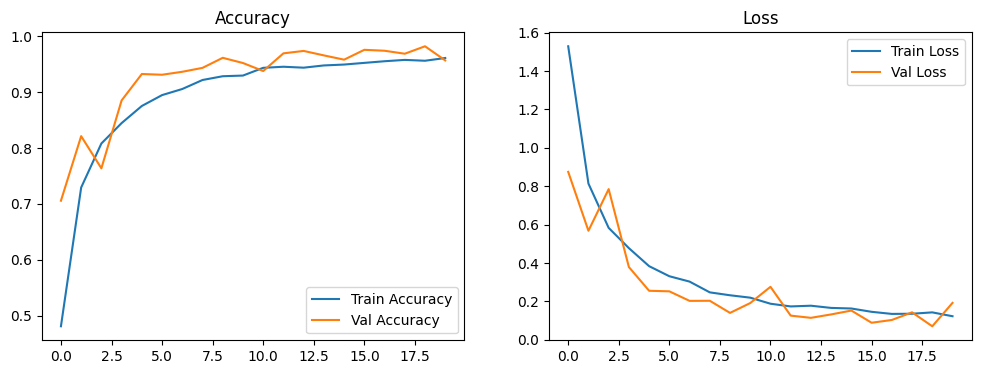

In [24]:
# Visualisasi Akurasi & Loss
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend(); plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title('Loss')
plt.show()

In [25]:
# Final training accuracy
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

Final Training Accuracy: 0.9613
Final Validation Accuracy: 0.9570


In [26]:
# Evaluasi Model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9876 - loss: 0.0411
Test Accuracy: 0.9850


In [27]:
# Klasifikasi dan Confusion Matrix
y_pred = model.predict(test_generator)
y_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_classes, target_names=test_generator.class_indices.keys()))

94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step
              precision    recall  f1-score   support

        Bean       0.94      0.99      0.97       200
Bitter_Gourd       0.99      0.99      0.99       200
Bottle_Gourd       1.00      0.99      1.00       200
     Brinjal       0.99      0.95      0.97       200
    Broccoli       0.98      0.98      0.98       200
     Cabbage       1.00      0.98      0.99       200
    Capsicum       0.99      0.97      0.98       200
      Carrot       1.00      1.00      1.00       200
 Cauliflower       0.97      0.98      0.98       200
    Cucumber       0.99      0.99      0.99       200
      Papaya       0.99      0.98      0.99       200
      Potato       0.99      0.99      0.99       200
     Pumpkin       0.99      0.99      0.99       200
      Radish       0.99      0.99      0.99       200
      Tomato       0.99      0.96      0.97       200

    accuracy                           0.98      3000
   macro avg       0.99      0.98      0

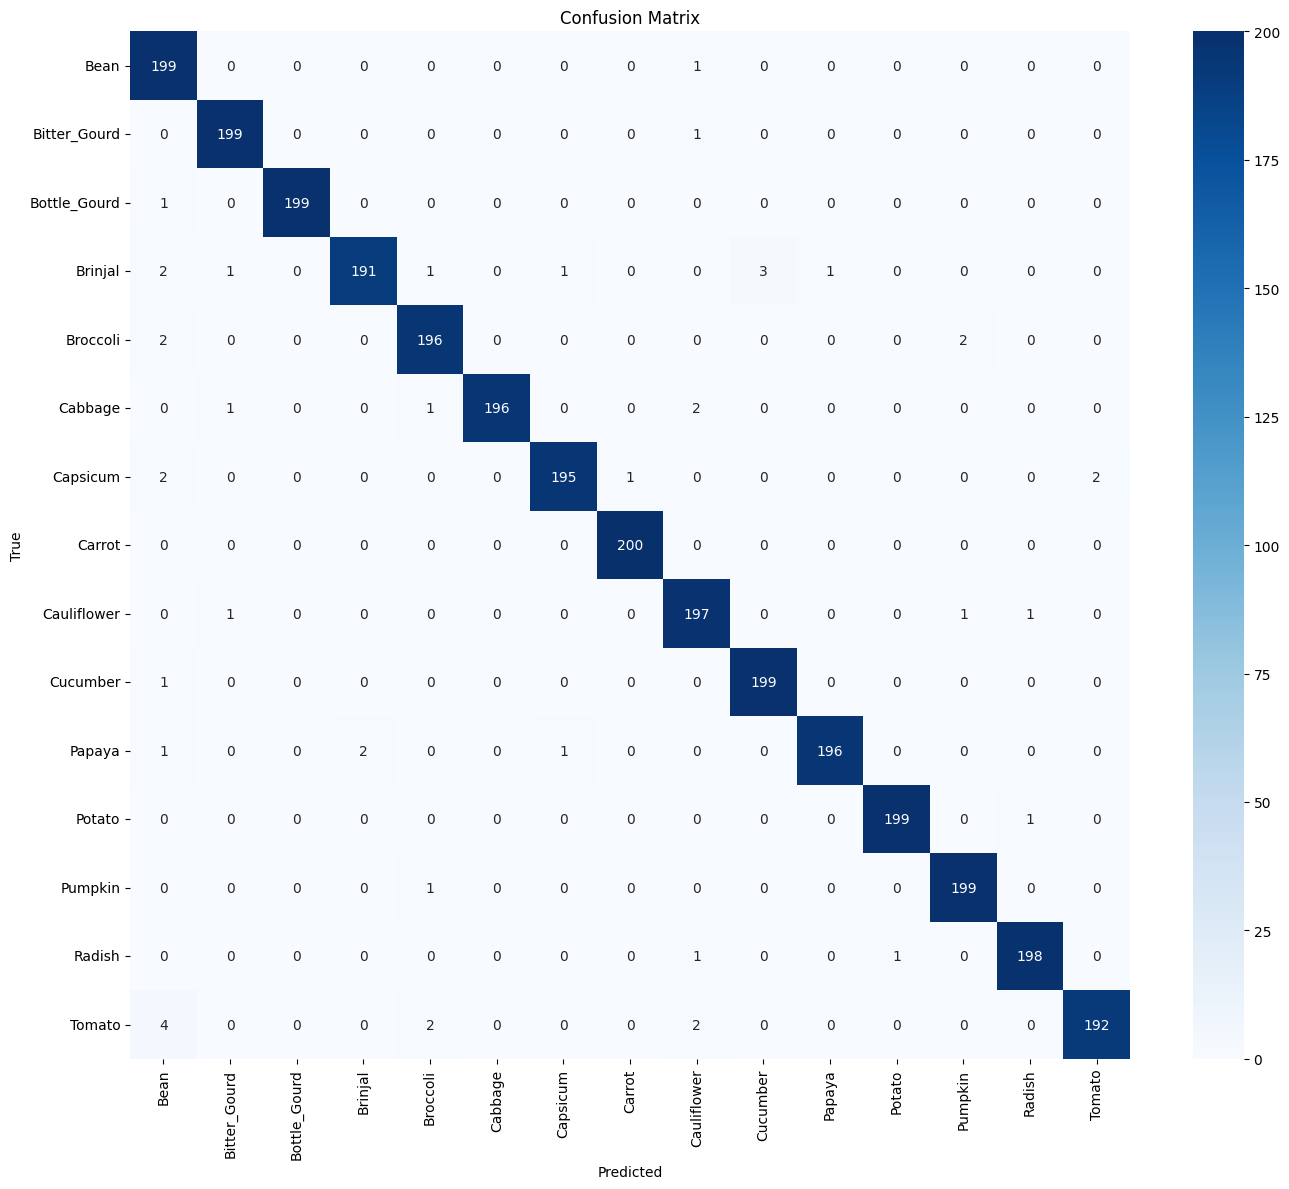

In [29]:
# Plot confusion matrix
cm = confusion_matrix(y_true, y_classes)
plt.figure(figsize=(14, 12))
class_names = list(test_generator.class_indices.keys())
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

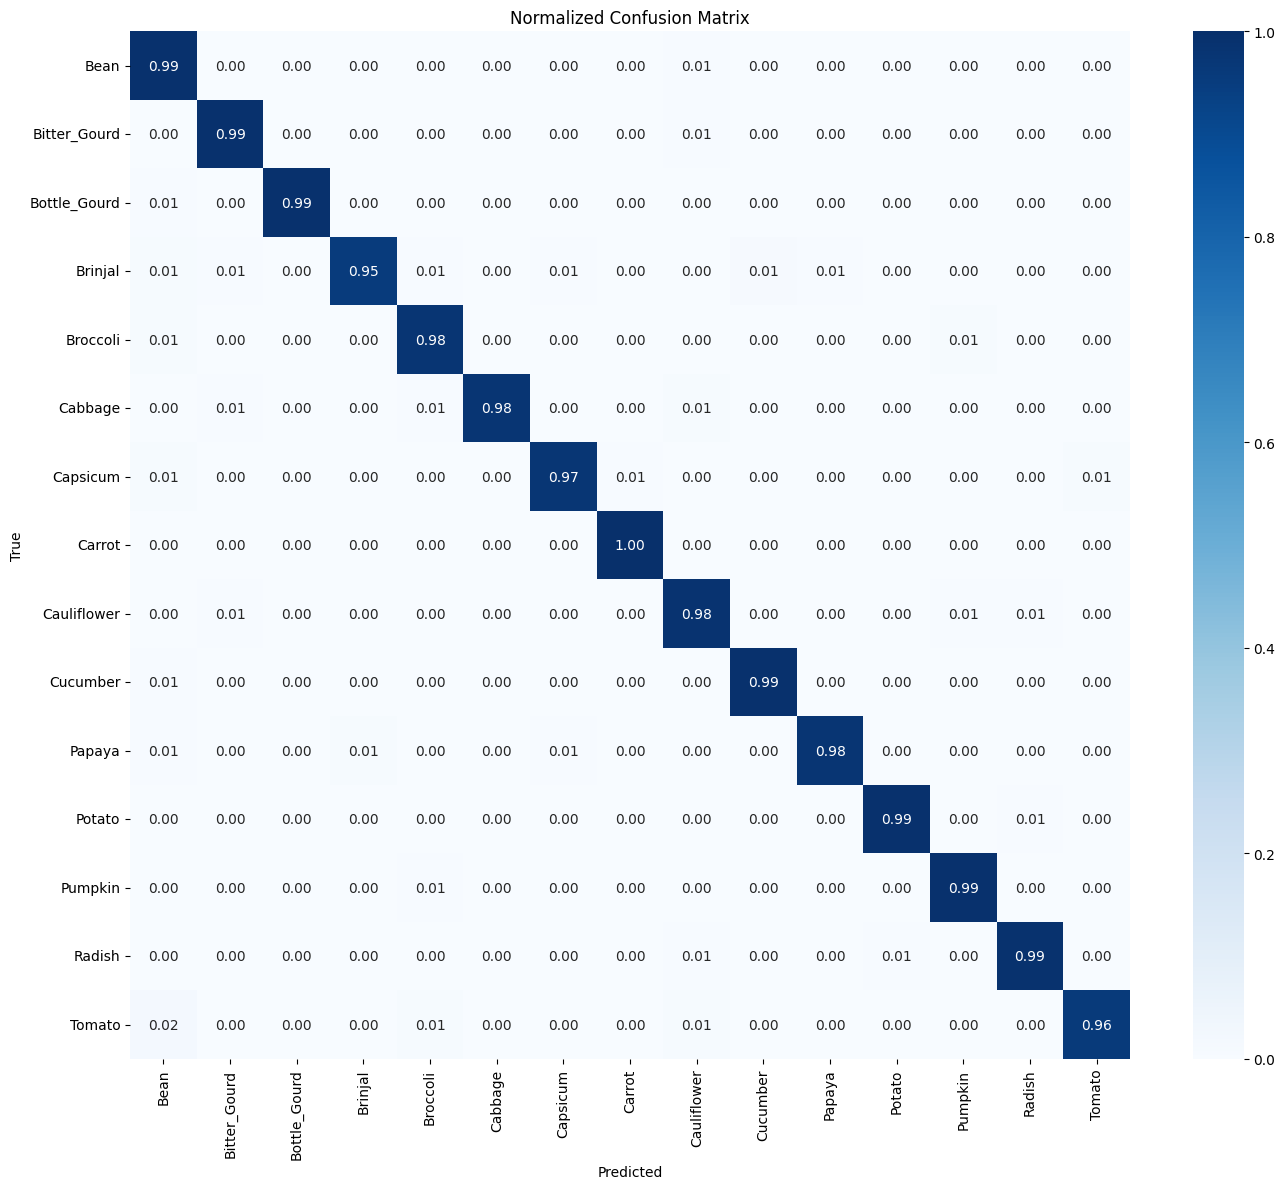

In [30]:
# Plot normalized confusion matrix for better interpretation
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(14, 12))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.tight_layout()
plt.show()

## Konversi Model

In [32]:
# Simpan Model
model.export('vegetable_model')

Saved artifact at 'vegetable_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor_22')
Output Type:
  TensorSpec(shape=(None, 15), dtype=tf.float32, name=None)
Captures:
  132908030742160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132908030743696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132908030743120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132908030744464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132908030743888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132908030745232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132908030744656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132908030746000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132908030745424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132908030746768: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [33]:
# Simpan sebagai TF-Lite
tflite_converter = tf.lite.TFLiteConverter.from_saved_model('vegetable_model')
tflite_model = tflite_converter.convert()
with open('vegetable_model.tflite', 'wb') as f:
    f.write(tflite_model)

In [34]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [35]:
# Simpan model ke format TFJS
!tensorflowjs_converter --input_format=tf_saved_model --output_format=tfjs_graph_model vegetable_model tfjs_model

2025-04-21 19:04:09.433159: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745262249.468517   18777 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745262249.479800   18777 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
2025-04-21 19:04:22.816432: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1745262262.816627   18777 gpu_device.cc:2022] Created device /job:localhost/replica:0/task

In [36]:
# Download Folder vegetable_model (save model)
!zip -r vegetable_model.zip vegetable_model
files.download('vegetable_model.zip')

# Download File TF-Lite
files.download('vegetable_model.tflite')

# Download Folder tfjs_model
!zip -r tfjs_model.zip tfjs_model
files.download('tfjs_model.zip')

  adding: vegetable_model/ (stored 0%)
  adding: vegetable_model/saved_model.pb (deflated 86%)
  adding: vegetable_model/fingerprint.pb (stored 0%)
  adding: vegetable_model/variables/ (stored 0%)
  adding: vegetable_model/variables/variables.index (deflated 61%)
  adding: vegetable_model/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: vegetable_model/assets/ (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  adding: tfjs_model/ (stored 0%)
  adding: tfjs_model/group1-shard5of7.bin (deflated 6%)
  adding: tfjs_model/group1-shard1of7.bin (deflated 6%)
  adding: tfjs_model/group1-shard4of7.bin (deflated 6%)
  adding: tfjs_model/group1-shard7of7.bin (deflated 6%)
  adding: tfjs_model/group1-shard2of7.bin (deflated 6%)
  adding: tfjs_model/group1-shard6of7.bin (deflated 6%)
  adding: tfjs_model/model.json (deflated 88%)
  adding: tfjs_model/group1-shard3of7.bin (deflated 6%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Inference (Optional)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step
Predicted class: Tomato


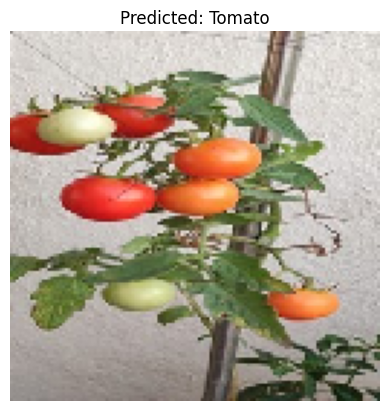

In [37]:
# Prediksi Satu Gambar
img_path = '/content/vegetable_dataset/Vegetable Images/test/Tomato/1020.jpg'

img = image.load_img(img_path, target_size=img_size)
img_array = image.img_to_array(img) / 255.
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = list(train_generator.class_indices.keys())[np.argmax(prediction)]
print(f"Predicted class: {predicted_class}")

plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()